# <span style='color:#2E86C1'>AVIATION SAFETY DATA ANALYSIS</span>

## <span style='color:#117A65'>Business Problem</span>

Your company is expanding into new industries to diversify its portfolio. Specifically, it is interested in purchasing and operating airplanes for commercial and private enterprises, but does not know anything about the potential risks of aircraft.
Objective: Determine which aircraft are the lowest risk for the company to purchase and translate findings into actionable insights for the head of the new aviation division.

<h2><b><span style='font-family:Georgia'> 1. Problem Statement </span></b><h2>

The company seeks to identify **low-risk aircrafts** to purchase as it ventures into the aviation business. This analysis aims to provide data-driven insights to support procurement decisions for both **commercial and private operations**.


<h2><b><span style='font-family:Georgia'>2. Importing Libraries</span></b></h2>

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<b><span style='font-family:Georgia'>Setting Visualization</span></b>

In [5]:
sns.set(style="whitegrid")
%matplotlib inline

<h2><b><span style='font-family:Georgia'>3. Loading the Dataset from National Transport and Safety Board </span></b></h2>

In [6]:
df = pd.read_csv("C:\\DS\\Phase1_Project\\AviationData.csv", encoding='ISO-8859-1')
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_31544\2988529497.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\DS\\Phase1_Project\\AviationData.csv", encoding='ISO-8859-1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


<h2><b><span style='font-family:Georgia'>4. Data Cleaning </span></b></h2>

<b><span style='font-family:Georgia'>Basic data overview to help us understand what's contained in the dataset </span></b>

In [7]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
df.info()

Shape: (88889, 31)

Columns:
 ['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 


In [8]:
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

<b><span style='font-family:Georgia'>Check for missing values </span></b>

In [9]:

df.isnull()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,True,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,True,True,True,False
88885,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
88886,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
88887,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,True,True,True,True


In [10]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

<b><span style='font-family:Georgia'> Visually understanding missing data </span></b>

<Axes: >

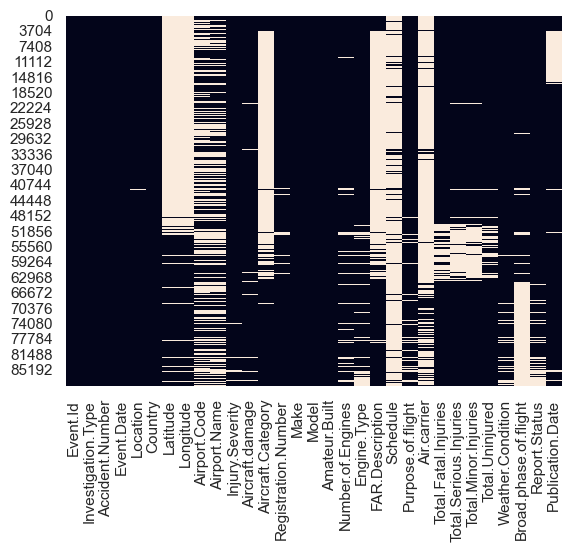

In [11]:
sns.heatmap(df.isnull(), cbar=False)

<b><span style='font-family:Georgia'> Representing the missing data as a percentage </span></b>

In [12]:
missing_percent = df.isnull().mean() * 100
print("\nMissing Values (%):\n", missing_percent[missing_percent > 0].sort_values(ascending=False))


Missing Values (%):
 Schedule                  85.845268
Air.carrier               81.271023
FAR.Description           63.974170
Aircraft.Category         63.677170
Longitude                 61.330423
Latitude                  61.320298
Airport.Code              43.601570
Airport.Name              40.708074
Broad.phase.of.flight     30.560587
Publication.Date          15.492356
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Fatal.Injuries      12.826109
Engine.Type                7.982990
Report.Status              7.181991
Purpose.of.flight          6.965991
Number.of.Engines          6.844491
Total.Uninjured            6.650992
Weather.Condition          5.053494
Aircraft.damage            3.593246
Registration.Number        1.554748
Injury.Severity            1.124999
Country                    0.254250
Amateur.Built              0.114750
Model                      0.103500
Make                       0.070875
Location                   0.058500
dtype:

<b><span style='font-family:Georgia'> Renaming columns to much suitable names that are easier to work with</span></b>

In [13]:
df.columns = [col.strip().replace(" ", "_").replace(".", "_").lower() for col in df.columns]
df.columns

Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')

<b><span style='font-family:Georgia'> Dropping and filling unnecessary and missing values respectively</span></b>

In [14]:
# The data set has unnecessary data for us to use while analyzing it. So we drop the data that we won't need

df.drop(columns=["event_id", "accident_number", "airport_code", "airport_name"], inplace=True, errors='ignore')

In [15]:
# with this much refined data, we can now work on missing data
# We start by dropping rows where key fields are missing

df.dropna(subset=["make", "model", "injury_severity", "aircraft_damage"], inplace=True)

In [16]:
# Fill less critical missing fields

df["engine_type"] = df["engine_type"].fillna("Unknown")
df["number_of_engines"] = df["number_of_engines"].fillna(df["number_of_engines"].mode()[0])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85121 entries, 0 to 88886
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   investigation_type      85121 non-null  object 
 1   event_date              85121 non-null  object 
 2   location                85076 non-null  object 
 3   country                 84911 non-null  object 
 4   latitude                33266 non-null  object 
 5   longitude               33256 non-null  object 
 6   injury_severity         85121 non-null  object 
 7   aircraft_damage         85121 non-null  object 
 8   aircraft_category       30334 non-null  object 
 9   registration_number     83952 non-null  object 
 10  make                    85121 non-null  object 
 11  model                   85121 non-null  object 
 12  amateur_built           85040 non-null  object 
 13  number_of_engines       85121 non-null  float64
 14  engine_type             85121 non-null  obj

In [18]:
df.describe()

,number_of_engines,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured
count,85121.000000,74223.000000,72953.000000,73662.000000,79321.000000
mean,1.120440,0.659243,0.273203,0.349923,3.457206
std,0.402402,5.288487,1.514876,2.231928,21.070114
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,295.000000,161.000000,380.000000,699.000000


<b><span style='font-family:Georgia'> Analyzing the score of total minor injuries</span></b>

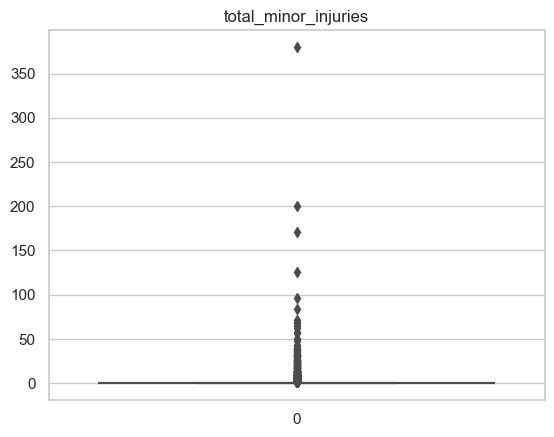

In [19]:

y = df['total_minor_injuries']
sns.boxplot(y)
plt.title('total_minor_injuries')
plt.show()

<b><span style='font-family:Georgia'>From the analysis of missing data above, we can now work on the individual columns to fill in or ignore missing and invalid values </span></b>

In [20]:
df['weather_condition'].unique()

array(['UNK', 'IMC', 'VMC', nan, 'Unk'], dtype=object)

In [21]:
df['weather_condition'].fillna('unk', inplace=True)

In [22]:
df.isna().sum()

investigation_type            0
event_date                    0
location                     45
country                     210
latitude                  51855
longitude                 51865
injury_severity               0
aircraft_damage               0
aircraft_category         54787
registration_number        1169
make                          0
model                         0
amateur_built                81
number_of_engines             0
engine_type                   0
far_description           55019
schedule                  74574
purpose_of_flight          4083
air_carrier               70276
total_fatal_injuries      10898
total_serious_injuries    12168
total_minor_injuries      11459
total_uninjured            5800
weather_condition             0
broad_phase_of_flight     24895
report_status              4864
publication_date          13083
dtype: int64

In [23]:
df['weather_condition'].str.upper()

0        UNK
1        UNK
2        IMC
3        IMC
4        VMC
        ... 
88869    UNK
88873    VMC
88876    UNK
88877    VMC
88886    VMC
Name: weather_condition, Length: 85121, dtype: object

In [24]:
dropped_columns = ['location', 'amateur_built', 'report_status', 'publication_date']
df.drop(dropped_columns, axis=1, inplace=True)

In [25]:
df.isna().sum()

investigation_type            0
event_date                    0
country                     210
latitude                  51855
longitude                 51865
injury_severity               0
aircraft_damage               0
aircraft_category         54787
registration_number        1169
make                          0
model                         0
number_of_engines             0
engine_type                   0
far_description           55019
schedule                  74574
purpose_of_flight          4083
air_carrier               70276
total_fatal_injuries      10898
total_serious_injuries    12168
total_minor_injuries      11459
total_uninjured            5800
weather_condition             0
broad_phase_of_flight     24895
dtype: int64

In [26]:
df['country'].unique()

array(['United States', nan, 'GULF OF MEXICO', 'Puerto Rico',
       'ATLANTIC OCEAN', 'HIGH ISLAND', 'Bahamas', 'MISSING', 'Pakistan',
       'Angola', 'Germany', 'Korea, Republic Of', 'Martinique',
       'American Samoa', 'PACIFIC OCEAN', 'Canada', 'Bolivia', 'Mexico',
       'Dominica', 'Netherlands Antilles', 'Iceland', 'Greece', 'Guam',
       'Australia', 'CARIBBEAN SEA', 'West Indies', 'Japan',
       'Philippines', 'Venezuela', 'Bermuda', 'San Juan Islands',
       'Colombia', 'El Salvador', 'United Kingdom',
       'British Virgin Islands', 'Netherlands', 'Mozambique', 'Jamaica',
       'Panama', 'Costa Rica', 'Norway', 'Hong Kong', 'Portugal',
       'Malaysia', 'Turks And Caicos Islands', 'Northern Mariana Islands',
       'Dominican Republic', 'Suriname', 'Honduras', 'Congo', 'Belize',
       'Guatemala', 'Anguilla', 'St Vincent And The Grenadines', 'Haiti',
       'Montserrat', 'Papua New Guinea', 'Cayman Islands', 'Sweden',
       'Taiwan', 'France', 'Barbados', 'BLOCK 6

In [27]:
df['country'].fillna('MISSING', inplace=True)

In [28]:
df.isna().sum()

investigation_type            0
event_date                    0
country                       0
latitude                  51855
longitude                 51865
injury_severity               0
aircraft_damage               0
aircraft_category         54787
registration_number        1169
make                          0
model                         0
number_of_engines             0
engine_type                   0
far_description           55019
schedule                  74574
purpose_of_flight          4083
air_carrier               70276
total_fatal_injuries      10898
total_serious_injuries    12168
total_minor_injuries      11459
total_uninjured            5800
weather_condition             0
broad_phase_of_flight     24895
dtype: int64

In [29]:
df['injury_severity'].unique()

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(29)', 'Fatal(70)', 'Unavailable', 'Fatal(135)', 'Fatal(31)',
       'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)',
       'Fatal(18)', 'Fatal(43)', 'Fatal(15)', 'Fatal(270)', 'Fatal(144)',
       'Fatal(174)', 'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)',
       'Fatal(27)', 'Fatal(34)', 'Fatal(87)', 'Fatal(16)', 'Fatal(47)',
       'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)', 'Fatal(54)',
       'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)', 'Fatal(189)',
       'Fatal(123)', 'Fatal(33)', 'Fatal(110)', 'Fatal(230)', 'Fatal(97)',
       'Fatal(125)', 'Fatal(35)', 'Fatal(228)', 'Fatal(75)', 'Fatal(104)',
       'Fatal(229)', 'Fatal(80)', 'Fatal(217)', 'Fatal

In [30]:
df['injury_severity'].fillna('Unavailable', inplace=True)

In [31]:
df.isna().sum()

investigation_type            0
event_date                    0
country                       0
latitude                  51855
longitude                 51865
injury_severity               0
aircraft_damage               0
aircraft_category         54787
registration_number        1169
make                          0
model                         0
number_of_engines             0
engine_type                   0
far_description           55019
schedule                  74574
purpose_of_flight          4083
air_carrier               70276
total_fatal_injuries      10898
total_serious_injuries    12168
total_minor_injuries      11459
total_uninjured            5800
weather_condition             0
broad_phase_of_flight     24895
dtype: int64

In [32]:
df['number_of_engines'].unique()

array([1., 2., 0., 4., 3., 8., 6.])

In [33]:
df['number_of_engines'].mode()

0    1.0
Name: number_of_engines, dtype: float64

In [34]:

df['number_of_engines'].fillna(df['number_of_engines'].mode()[0], inplace=True)

In [35]:
df.isna().sum()

investigation_type            0
event_date                    0
country                       0
latitude                  51855
longitude                 51865
injury_severity               0
aircraft_damage               0
aircraft_category         54787
registration_number        1169
make                          0
model                         0
number_of_engines             0
engine_type                   0
far_description           55019
schedule                  74574
purpose_of_flight          4083
air_carrier               70276
total_fatal_injuries      10898
total_serious_injuries    12168
total_minor_injuries      11459
total_uninjured            5800
weather_condition             0
broad_phase_of_flight     24895
dtype: int64

In [36]:
df['engine_type'].unique()

array(['Reciprocating', 'Unknown', 'Turbo Fan', 'Turbo Shaft',
       'Turbo Prop', 'Turbo Jet', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

In [37]:
df['engine_type'].fillna('Unknown', inplace=True)

In [38]:
df.isna().sum()

investigation_type            0
event_date                    0
country                       0
latitude                  51855
longitude                 51865
injury_severity               0
aircraft_damage               0
aircraft_category         54787
registration_number        1169
make                          0
model                         0
number_of_engines             0
engine_type                   0
far_description           55019
schedule                  74574
purpose_of_flight          4083
air_carrier               70276
total_fatal_injuries      10898
total_serious_injuries    12168
total_minor_injuries      11459
total_uninjured            5800
weather_condition             0
broad_phase_of_flight     24895
dtype: int64

In [39]:
# Dropping empty rows
df.dropna(subset=['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured'], inplace=True)

In [40]:
df.isna().sum()

investigation_type            0
event_date                    0
country                       0
latitude                  49344
longitude                 49344
injury_severity               0
aircraft_damage               0
aircraft_category         44754
registration_number         219
make                          0
model                         0
number_of_engines             0
engine_type                   0
far_description           44989
schedule                  62041
purpose_of_flight          2801
air_carrier               56696
total_fatal_injuries          0
total_serious_injuries        0
total_minor_injuries          0
total_uninjured               0
weather_condition             0
broad_phase_of_flight     23719
dtype: int64

In [41]:
df['purpose_of_flight'].unique()

array(['Personal', 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', nan, 'Other Work Use', 'Positioning',
       'Flight Test', 'Skydiving', 'Public Aircraft - Local',
       'Public Aircraft - Federal', 'Glider Tow', 'External Load',
       'Banner Tow', 'Air Race show', 'Public Aircraft - State',
       'Firefighting', 'Air Drop', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [42]:
df['purpose_of_flight'].fillna('Unknown', inplace=True)

In [43]:
df.isna().sum()

investigation_type            0
event_date                    0
country                       0
latitude                  49344
longitude                 49344
injury_severity               0
aircraft_damage               0
aircraft_category         44754
registration_number         219
make                          0
model                         0
number_of_engines             0
engine_type                   0
far_description           44989
schedule                  62041
purpose_of_flight             0
air_carrier               56696
total_fatal_injuries          0
total_serious_injuries        0
total_minor_injuries          0
total_uninjured               0
weather_condition             0
broad_phase_of_flight     23719
dtype: int64

In [44]:
df["aircraft_category"].unique()

array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Weight-Shift', 'Powered Parachute',
       'Rocket', 'Powered-Lift', 'Blimp', 'WSFT', 'ULTR'], dtype=object)

In [45]:
df['aircraft_category'].fillna('Unknown', inplace=True)

In [46]:
df.isna().sum()

investigation_type            0
event_date                    0
country                       0
latitude                  49344
longitude                 49344
injury_severity               0
aircraft_damage               0
aircraft_category             0
registration_number         219
make                          0
model                         0
number_of_engines             0
engine_type                   0
far_description           44989
schedule                  62041
purpose_of_flight             0
air_carrier               56696
total_fatal_injuries          0
total_serious_injuries        0
total_minor_injuries          0
total_uninjured               0
weather_condition             0
broad_phase_of_flight     23719
dtype: int64

In [47]:
df['broad_phase_of_flight'].unique()

array(['Cruise', 'Unknown', 'Takeoff', 'Landing', 'Approach', 'Taxi',
       'Descent', 'Maneuvering', 'Climb', 'Standing', 'Go-around',
       'Other', nan], dtype=object)

In [48]:
df['broad_phase_of_flight'].fillna('Unknown', inplace=True)

In [49]:
df.isna().sum()

investigation_type            0
event_date                    0
country                       0
latitude                  49344
longitude                 49344
injury_severity               0
aircraft_damage               0
aircraft_category             0
registration_number         219
make                          0
model                         0
number_of_engines             0
engine_type                   0
far_description           44989
schedule                  62041
purpose_of_flight             0
air_carrier               56696
total_fatal_injuries          0
total_serious_injuries        0
total_minor_injuries          0
total_uninjured               0
weather_condition             0
broad_phase_of_flight         0
dtype: int64

In [50]:
df['latitude'].unique()

array([nan, '29.607222', '33.948611', ..., '321814N', '039101N',
       '373829N'], dtype=object)

In [51]:
df['latitude'].fillna('MISSING', inplace=True)

In [52]:
df.isna().sum()

investigation_type            0
event_date                    0
country                       0
latitude                      0
longitude                 49344
injury_severity               0
aircraft_damage               0
aircraft_category             0
registration_number         219
make                          0
model                         0
number_of_engines             0
engine_type                   0
far_description           44989
schedule                  62041
purpose_of_flight             0
air_carrier               56696
total_fatal_injuries          0
total_serious_injuries        0
total_minor_injuries          0
total_uninjured               0
weather_condition             0
broad_phase_of_flight         0
dtype: int64

In [53]:
df['longitude'].unique()

array([nan, '-95.158611', '-118.413611', ..., '1114536W', '0835218W',
       '0121410W'], dtype=object)

In [54]:
df['longitude'].fillna('MISSING', inplace=True)

In [55]:
df.isna().sum()

investigation_type            0
event_date                    0
country                       0
latitude                      0
longitude                     0
injury_severity               0
aircraft_damage               0
aircraft_category             0
registration_number         219
make                          0
model                         0
number_of_engines             0
engine_type                   0
far_description           44989
schedule                  62041
purpose_of_flight             0
air_carrier               56696
total_fatal_injuries          0
total_serious_injuries        0
total_minor_injuries          0
total_uninjured               0
weather_condition             0
broad_phase_of_flight         0
dtype: int64

In [56]:
df["registration_number"].unique()

array(['NC6404', 'N5069P', 'N1168J', ..., 'N398KL', 'N5405V', 'N749PJ'],
      dtype=object)

In [57]:
df['registration_number'].fillna('MISSING', inplace=True)

In [58]:
df.isna().sum()

investigation_type            0
event_date                    0
country                       0
latitude                      0
longitude                     0
injury_severity               0
aircraft_damage               0
aircraft_category             0
registration_number           0
make                          0
model                         0
number_of_engines             0
engine_type                   0
far_description           44989
schedule                  62041
purpose_of_flight             0
air_carrier               56696
total_fatal_injuries          0
total_serious_injuries        0
total_minor_injuries          0
total_uninjured               0
weather_condition             0
broad_phase_of_flight         0
dtype: int64

In [59]:
df['far_description'].unique()

array([nan, 'Part 91: General Aviation', 'Part 135: Air Taxi & Commuter',
       'Part 125: 20+ Pax,6000+ lbs', 'Part 129: Foreign',
       'Part 137: Agricultural', 'Part 133: Rotorcraft Ext. Load',
       'Part 121: Air Carrier', 'Unknown', 'Part 91F: Special Flt Ops.',
       'Non-U.S., Non-Commercial', 'Non-U.S., Commercial', 'Public Use',
       '091', '135', 'NUSC', 'NUSN', '121', '137', '133', '091K', 'UNK',
       '129', 'PUBU', '103', '125', '437', 'ARMF', '107'], dtype=object)

In [60]:
df['far_description'].fillna('MISSING', inplace=True)

In [61]:
df.isna().sum()

investigation_type            0
event_date                    0
country                       0
latitude                      0
longitude                     0
injury_severity               0
aircraft_damage               0
aircraft_category             0
registration_number           0
make                          0
model                         0
number_of_engines             0
engine_type                   0
far_description               0
schedule                  62041
purpose_of_flight             0
air_carrier               56696
total_fatal_injuries          0
total_serious_injuries        0
total_minor_injuries          0
total_uninjured               0
weather_condition             0
broad_phase_of_flight         0
dtype: int64

In [62]:
#df

In [63]:
df['schedule'].unique()

array([nan, 'NSCH', 'SCHD', 'UNK'], dtype=object)

In [64]:
df['schedule'].fillna('MISSING', inplace=True)

In [65]:
df.isna().sum()

investigation_type            0
event_date                    0
country                       0
latitude                      0
longitude                     0
injury_severity               0
aircraft_damage               0
aircraft_category             0
registration_number           0
make                          0
model                         0
number_of_engines             0
engine_type                   0
far_description               0
schedule                      0
purpose_of_flight             0
air_carrier               56696
total_fatal_injuries          0
total_serious_injuries        0
total_minor_injuries          0
total_uninjured               0
weather_condition             0
broad_phase_of_flight         0
dtype: int64

In [66]:
df['air_carrier'].unique()

array([nan, 'Rocky Mountain Helicopters, In', 'Lang Air Service', ...,
       'REACH AIR MEDICAL SERVICES LLC', 'SKY WEST AVIATION INC TRUSTEE',
       'GERBER RICHARD E'], dtype=object)

In [67]:
df['air_carrier'].fillna('MISSING', inplace=True)

In [68]:
df.isna().sum()

investigation_type        0
event_date                0
country                   0
latitude                  0
longitude                 0
injury_severity           0
aircraft_damage           0
aircraft_category         0
registration_number       0
make                      0
model                     0
number_of_engines         0
engine_type               0
far_description           0
schedule                  0
purpose_of_flight         0
air_carrier               0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
broad_phase_of_flight     0
dtype: int64

In [69]:
print(df['injury_severity'].unique())

['Fatal(2)' 'Fatal(4)' 'Non-Fatal' 'Fatal(1)' 'Fatal(3)' 'Incident'
 'Fatal(8)' 'Fatal(78)' 'Fatal(7)' 'Fatal(6)' 'Fatal(5)' 'Fatal(153)'
 'Fatal(12)' 'Fatal(23)' 'Fatal(10)' 'Fatal(9)' 'Fatal(17)' 'Fatal(13)'
 'Fatal(29)' 'Fatal(70)' 'Unavailable' 'Fatal(135)' 'Fatal(31)'
 'Fatal(14)' 'Fatal(256)' 'Fatal(25)' 'Fatal(82)' 'Fatal(156)' 'Fatal(28)'
 'Fatal(18)' 'Fatal(43)' 'Fatal(15)' 'Fatal(270)' 'Fatal(144)'
 'Fatal(174)' 'Fatal(11)' 'Fatal(111)' 'Fatal(131)' 'Fatal(20)'
 'Fatal(73)' 'Fatal(27)' 'Fatal(34)' 'Fatal(87)' 'Fatal(47)' 'Fatal(56)'
 'Fatal(37)' 'Fatal(132)' 'Fatal(68)' 'Fatal(52)' 'Fatal(65)' 'Fatal(72)'
 'Fatal(189)' 'Fatal(123)' 'Fatal(33)' 'Fatal(110)' 'Fatal(230)'
 'Fatal(125)' 'Fatal(75)' 'Fatal(97)' 'Fatal(104)' 'Fatal(16)' 'Fatal(80)'
 'Fatal(88)' 'Fatal(19)' 'Fatal(113)' 'Fatal(143)' 'Fatal(83)' 'Fatal'
 'Minor' 'Serious']


In [70]:
df.isna().sum()

investigation_type        0
event_date                0
country                   0
latitude                  0
longitude                 0
injury_severity           0
aircraft_damage           0
aircraft_category         0
registration_number       0
make                      0
model                     0
number_of_engines         0
engine_type               0
far_description           0
schedule                  0
purpose_of_flight         0
air_carrier               0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
broad_phase_of_flight     0
dtype: int64

In [71]:
# Converting dates
if 'event_date' in df.columns:
    df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce')

In [72]:
# Converting numeric columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

In [73]:
# Cleaning all text/object columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.strip().str.lower()

In [74]:
#Standardizing text columns
df["make"] = df["make"].str.strip().str.lower()
df["model"] = df["model"].str.strip().str.upper()
df["injury_severity"] = df["injury_severity"].str.title()
df["aircraft_damage"] = df["aircraft_damage"].str.title()

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71137 entries, 0 to 88886
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   investigation_type      71137 non-null  object        
 1   event_date              71137 non-null  datetime64[ns]
 2   country                 71137 non-null  object        
 3   latitude                71137 non-null  object        
 4   longitude               71137 non-null  object        
 5   injury_severity         71137 non-null  object        
 6   aircraft_damage         71137 non-null  object        
 7   aircraft_category       71137 non-null  object        
 8   registration_number     71137 non-null  object        
 9   make                    71137 non-null  object        
 10  model                   71137 non-null  object        
 11  number_of_engines       71137 non-null  float64       
 12  engine_type             71137 non-null  object     

In [76]:
df.head()

,investigation_type,event_date,country,latitude,longitude,injury_severity,aircraft_damage,aircraft_category,registration_number,make,...,far_description,schedule,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
0,accident,1948-10-24,united states,missing,missing,Fatal(2),Destroyed,unknown,nc6404,stinson,...,missing,missing,personal,missing,2.0,0.0,0.0,0.0,unk,cruise
1,accident,1962-07-19,united states,missing,missing,Fatal(4),Destroyed,unknown,n5069p,piper,...,missing,missing,personal,missing,4.0,0.0,0.0,0.0,unk,unknown
3,accident,1977-06-19,united states,missing,missing,Fatal(2),Destroyed,unknown,n1168j,rockwell,...,missing,missing,personal,missing,2.0,0.0,0.0,0.0,imc,cruise
6,accident,1981-08-01,united states,missing,missing,Fatal(4),Destroyed,unknown,n4988e,cessna,...,missing,missing,personal,missing,4.0,0.0,0.0,0.0,imc,unknown
7,accident,1982-01-01,united states,missing,missing,Non-Fatal,Substantial,airplane,n2482n,cessna,...,part 91: general aviation,missing,personal,missing,0.0,0.0,0.0,2.0,vmc,takeoff


In [77]:
df

,investigation_type,event_date,country,latitude,longitude,injury_severity,aircraft_damage,aircraft_category,registration_number,make,...,far_description,schedule,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
0,accident,1948-10-24,united states,missing,missing,Fatal(2),Destroyed,unknown,nc6404,stinson,...,missing,missing,personal,missing,2.0,0.0,0.0,0.0,unk,cruise
1,accident,1962-07-19,united states,missing,missing,Fatal(4),Destroyed,unknown,n5069p,piper,...,missing,missing,personal,missing,4.0,0.0,0.0,0.0,unk,unknown
3,accident,1977-06-19,united states,missing,missing,Fatal(2),Destroyed,unknown,n1168j,rockwell,...,missing,missing,personal,missing,2.0,0.0,0.0,0.0,imc,cruise
6,accident,1981-08-01,united states,missing,missing,Fatal(4),Destroyed,unknown,n4988e,cessna,...,missing,missing,personal,missing,4.0,0.0,0.0,0.0,imc,unknown
7,accident,1982-01-01,united states,missing,missing,Non-Fatal,Substantial,airplane,n2482n,cessna,...,part 91: general aviation,missing,personal,missing,0.0,0.0,0.0,2.0,vmc,takeoff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,accident,2022-12-13,united states,047257n,0109280w,Non-Fatal,Substantial,airplane,c-gzpu,piper,...,nusc,missing,unknown,missing,0.0,0.0,0.0,1.0,unk,unknown
88873,accident,2022-12-14,united states,182724n,0066554w,Non-Fatal,Substantial,airplane,n416pc,cirrus design corp,...,091,missing,personal,sky west aviation inc trustee,0.0,0.0,0.0,1.0,vmc,unknown
88876,accident,2022-12-15,united states,373829n,0972635w,Non-Fatal,Substantial,airplane,n398kl,swearingen,...,135,schd,unknown,missing,0.0,0.0,0.0,1.0,unk,unknown
88877,accident,2022-12-16,united states,282825n,0822719w,Minor,Substantial,airplane,n5405v,cessna,...,091,missing,personal,gerber richard e,0.0,1.0,0.0,0.0,vmc,unknown


<h2><b><span style='font-family:Georgia'>5. Exploratory Data analysis </span></b></h2>

<b><span style='font-family:Georgia'> Weather conditions affecting flights </span></b>

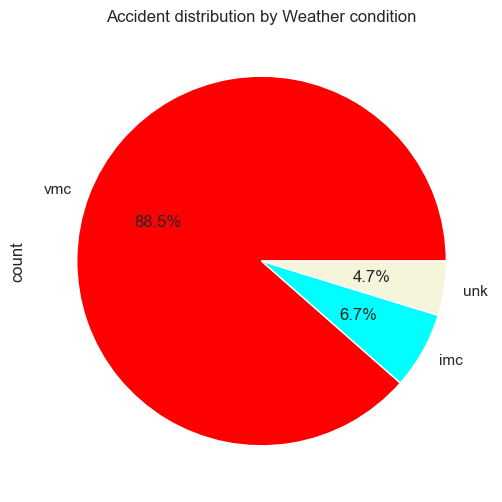

In [78]:
df['weather_condition'].value_counts().plot.pie(autopct = '%1.1f%%', colors = ['red','aqua', 'beige'], figsize = (6,6))
plt.title('Accident distribution by Weather condition')
plt.savefig("weather.png", dpi=300, bbox_inches='tight')
plt.show()

- **VMC**: Visual Metrological Conditions
- **IMC**: Instrument Metrological Conditions
- **UNK**: Unknown

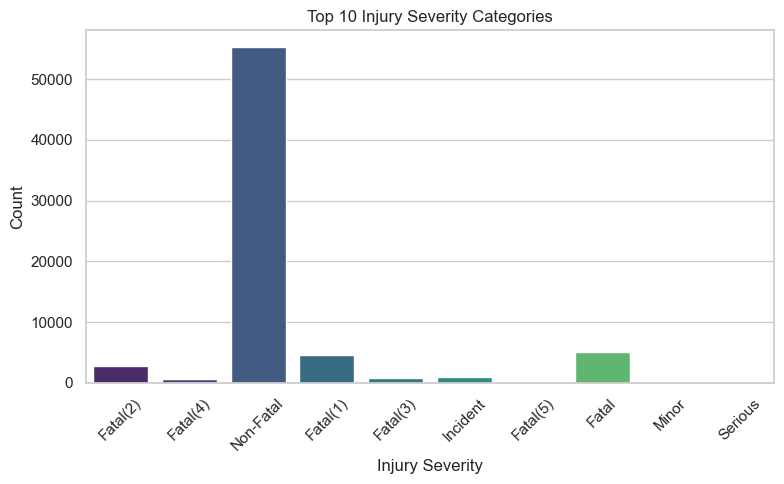

In [79]:
top_n = df['injury_severity'].value_counts().nlargest(10).index

plt.figure(figsize=(8, 5))
sns.countplot(
    data=df[df['injury_severity'].isin(top_n)], 
    x='injury_severity',
    palette="viridis"
)
plt.title("Top 10 Injury Severity Categories")
plt.xlabel("Injury Severity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

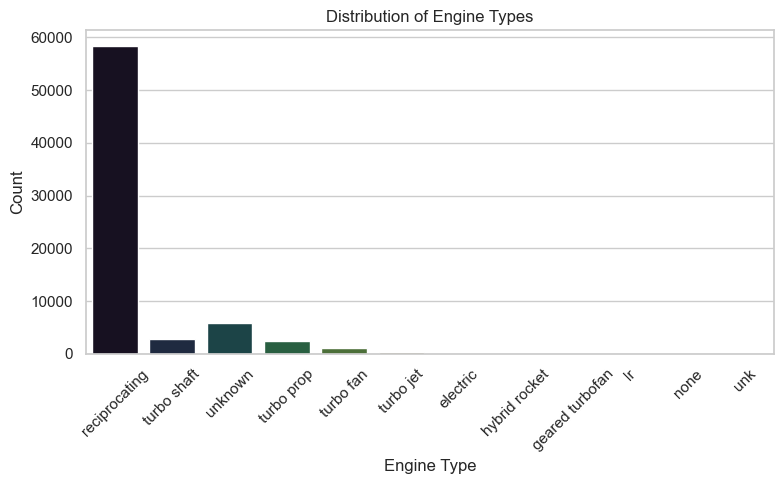

In [80]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='engine_type', palette="cubehelix")
plt.title("Distribution of Engine Types")
plt.xlabel("Engine Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

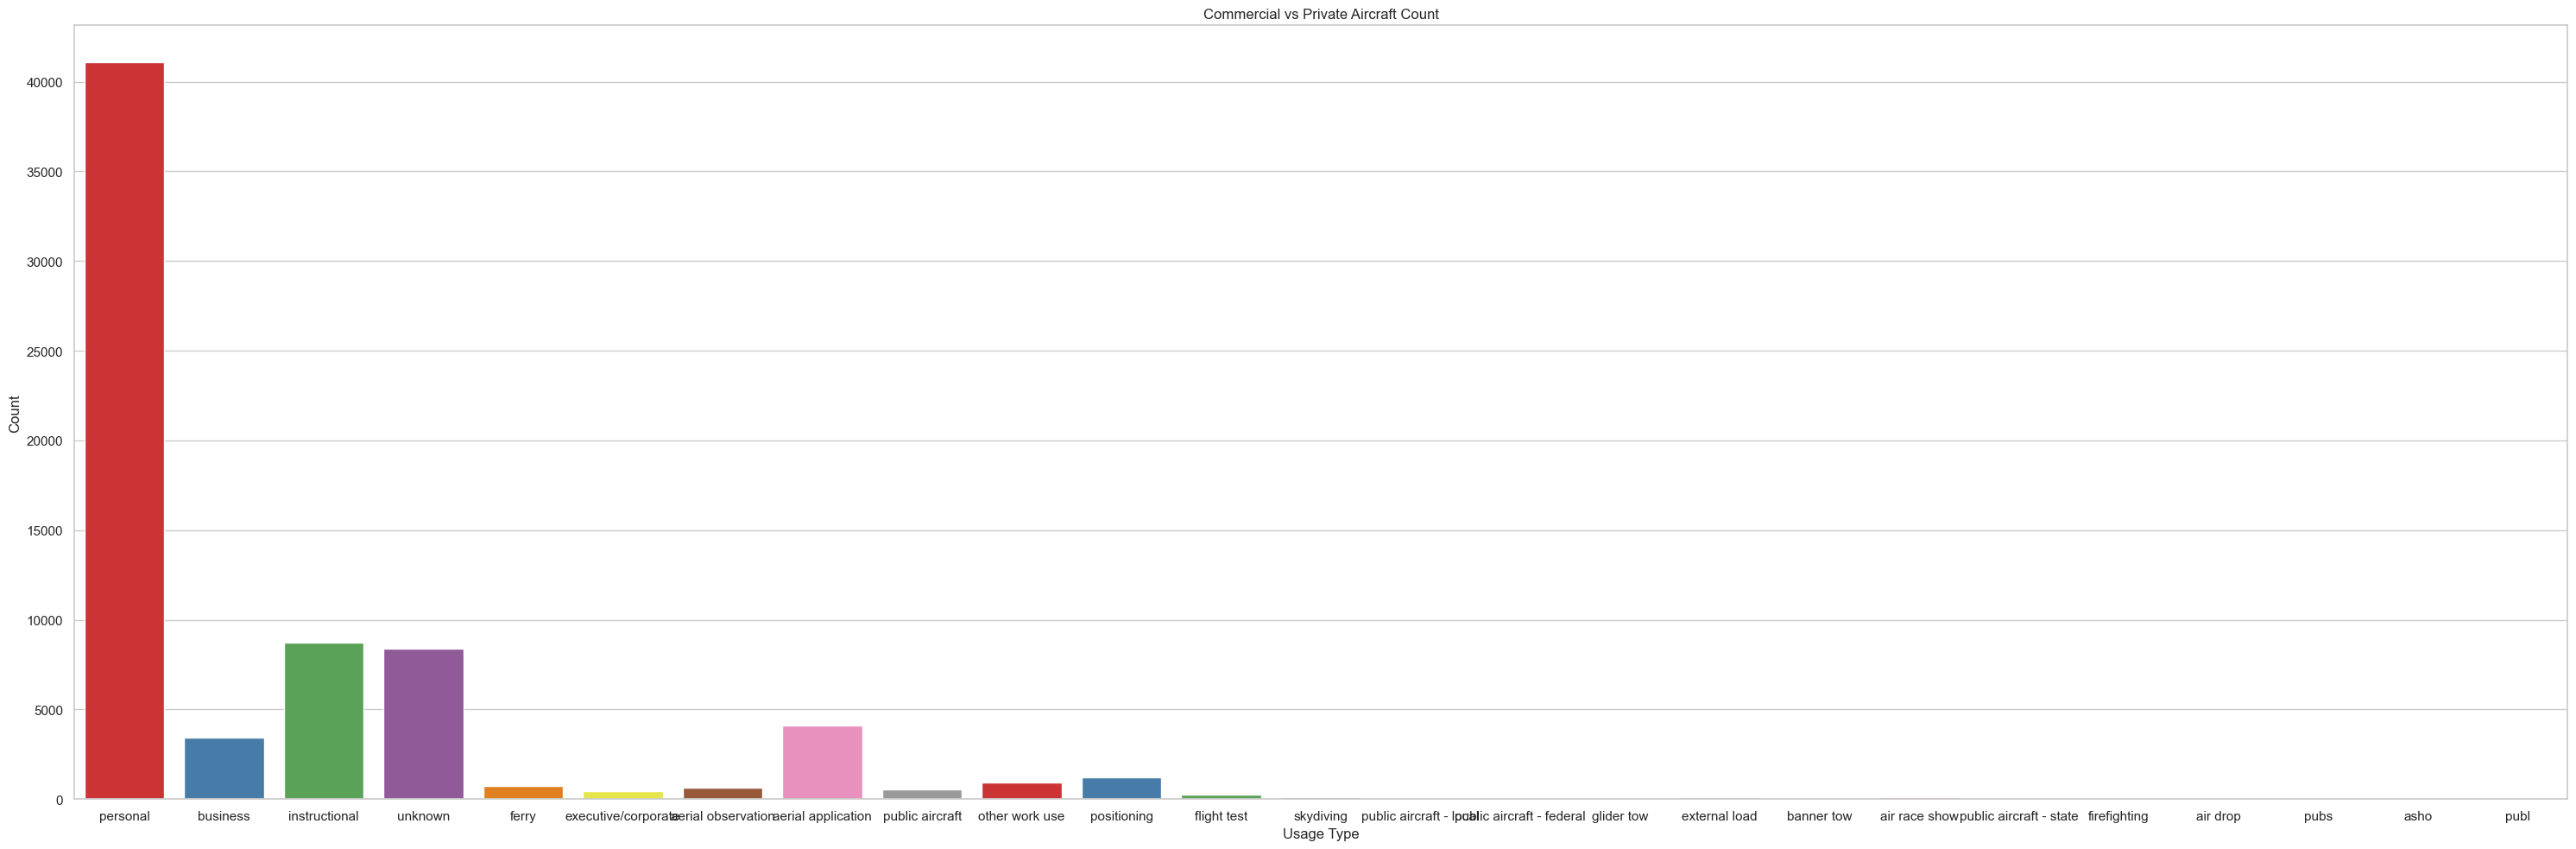

In [81]:
plt.figure(figsize=(30,10 ))
sns.countplot(data=df, x='purpose_of_flight', palette="Set1")
plt.title("Commercial vs Private Aircraft Count")
plt.xlabel("Usage Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

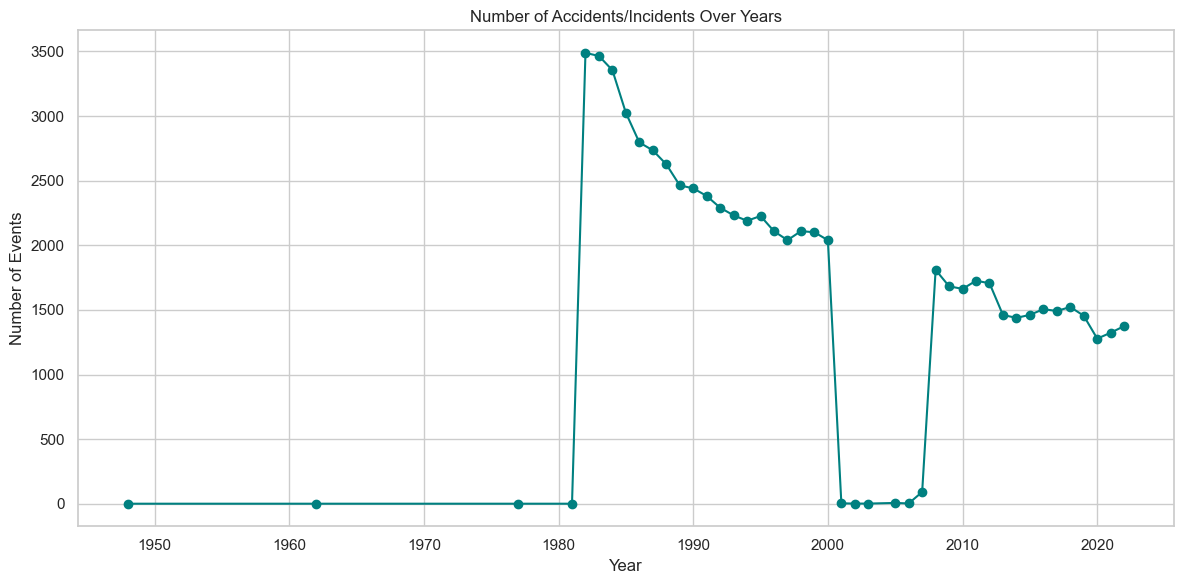

In [82]:
plt.figure(figsize=(12, 6))
df['event_date'].dt.year.value_counts().sort_index().plot(kind='line', marker='o', color='teal')
plt.title("Number of Accidents/Incidents Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.tight_layout()
plt.savefig("accidents_over_years.png", dpi=300, bbox_inches='tight')
plt.show()

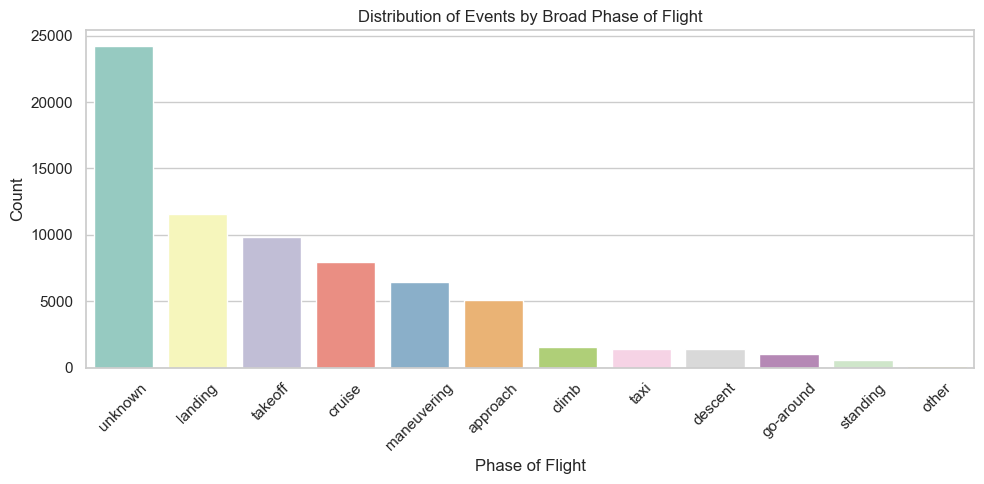

In [83]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='broad_phase_of_flight', order=df['broad_phase_of_flight'].value_counts().index, palette='Set3')
plt.title("Distribution of Events by Broad Phase of Flight")
plt.xlabel("Phase of Flight")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [84]:
df

,investigation_type,event_date,country,latitude,longitude,injury_severity,aircraft_damage,aircraft_category,registration_number,make,...,far_description,schedule,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
0,accident,1948-10-24,united states,missing,missing,Fatal(2),Destroyed,unknown,nc6404,stinson,...,missing,missing,personal,missing,2.0,0.0,0.0,0.0,unk,cruise
1,accident,1962-07-19,united states,missing,missing,Fatal(4),Destroyed,unknown,n5069p,piper,...,missing,missing,personal,missing,4.0,0.0,0.0,0.0,unk,unknown
3,accident,1977-06-19,united states,missing,missing,Fatal(2),Destroyed,unknown,n1168j,rockwell,...,missing,missing,personal,missing,2.0,0.0,0.0,0.0,imc,cruise
6,accident,1981-08-01,united states,missing,missing,Fatal(4),Destroyed,unknown,n4988e,cessna,...,missing,missing,personal,missing,4.0,0.0,0.0,0.0,imc,unknown
7,accident,1982-01-01,united states,missing,missing,Non-Fatal,Substantial,airplane,n2482n,cessna,...,part 91: general aviation,missing,personal,missing,0.0,0.0,0.0,2.0,vmc,takeoff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,accident,2022-12-13,united states,047257n,0109280w,Non-Fatal,Substantial,airplane,c-gzpu,piper,...,nusc,missing,unknown,missing,0.0,0.0,0.0,1.0,unk,unknown
88873,accident,2022-12-14,united states,182724n,0066554w,Non-Fatal,Substantial,airplane,n416pc,cirrus design corp,...,091,missing,personal,sky west aviation inc trustee,0.0,0.0,0.0,1.0,vmc,unknown
88876,accident,2022-12-15,united states,373829n,0972635w,Non-Fatal,Substantial,airplane,n398kl,swearingen,...,135,schd,unknown,missing,0.0,0.0,0.0,1.0,unk,unknown
88877,accident,2022-12-16,united states,282825n,0822719w,Minor,Substantial,airplane,n5405v,cessna,...,091,missing,personal,gerber richard e,0.0,1.0,0.0,0.0,vmc,unknown


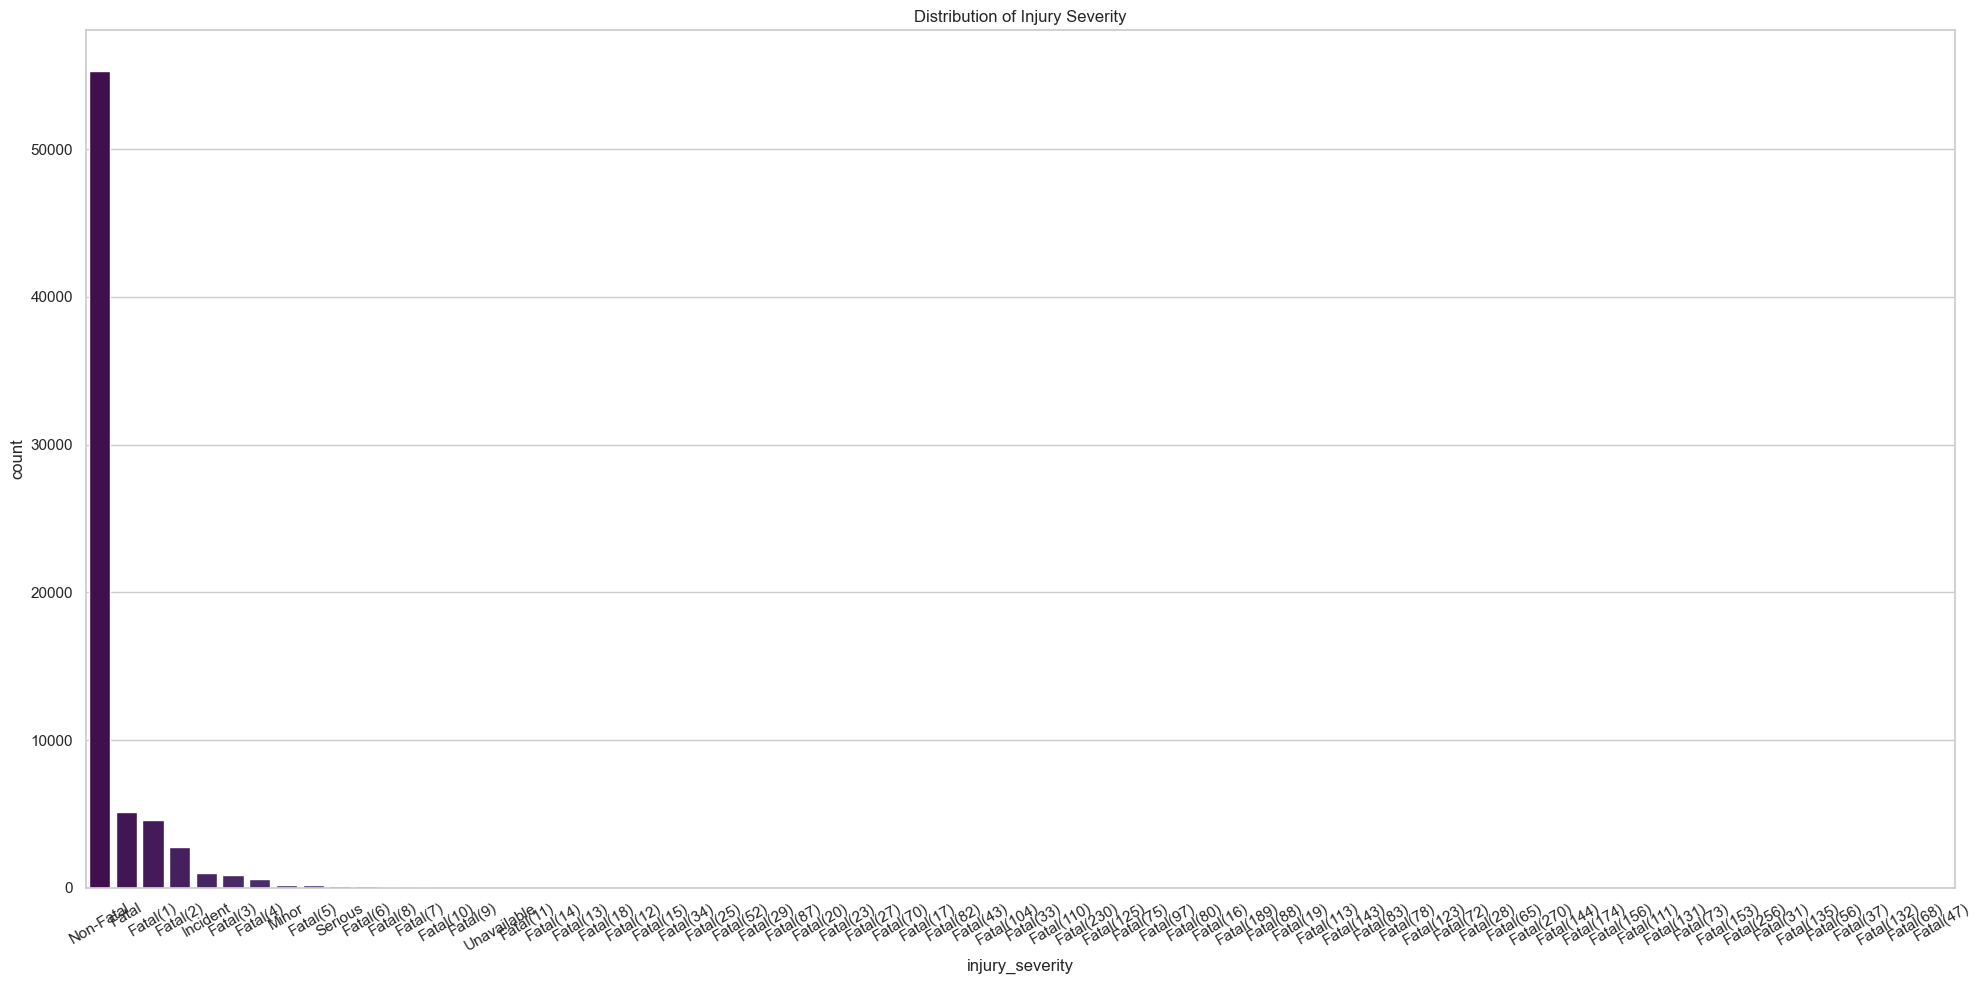

In [85]:
# For we are investigating risks and safety of airplanes, we start by looking at how severe the injuries usually are by our dataset
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x="injury_severity", order=df["injury_severity"].value_counts().index, palette="viridis")
plt.title("Distribution of Injury Severity")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

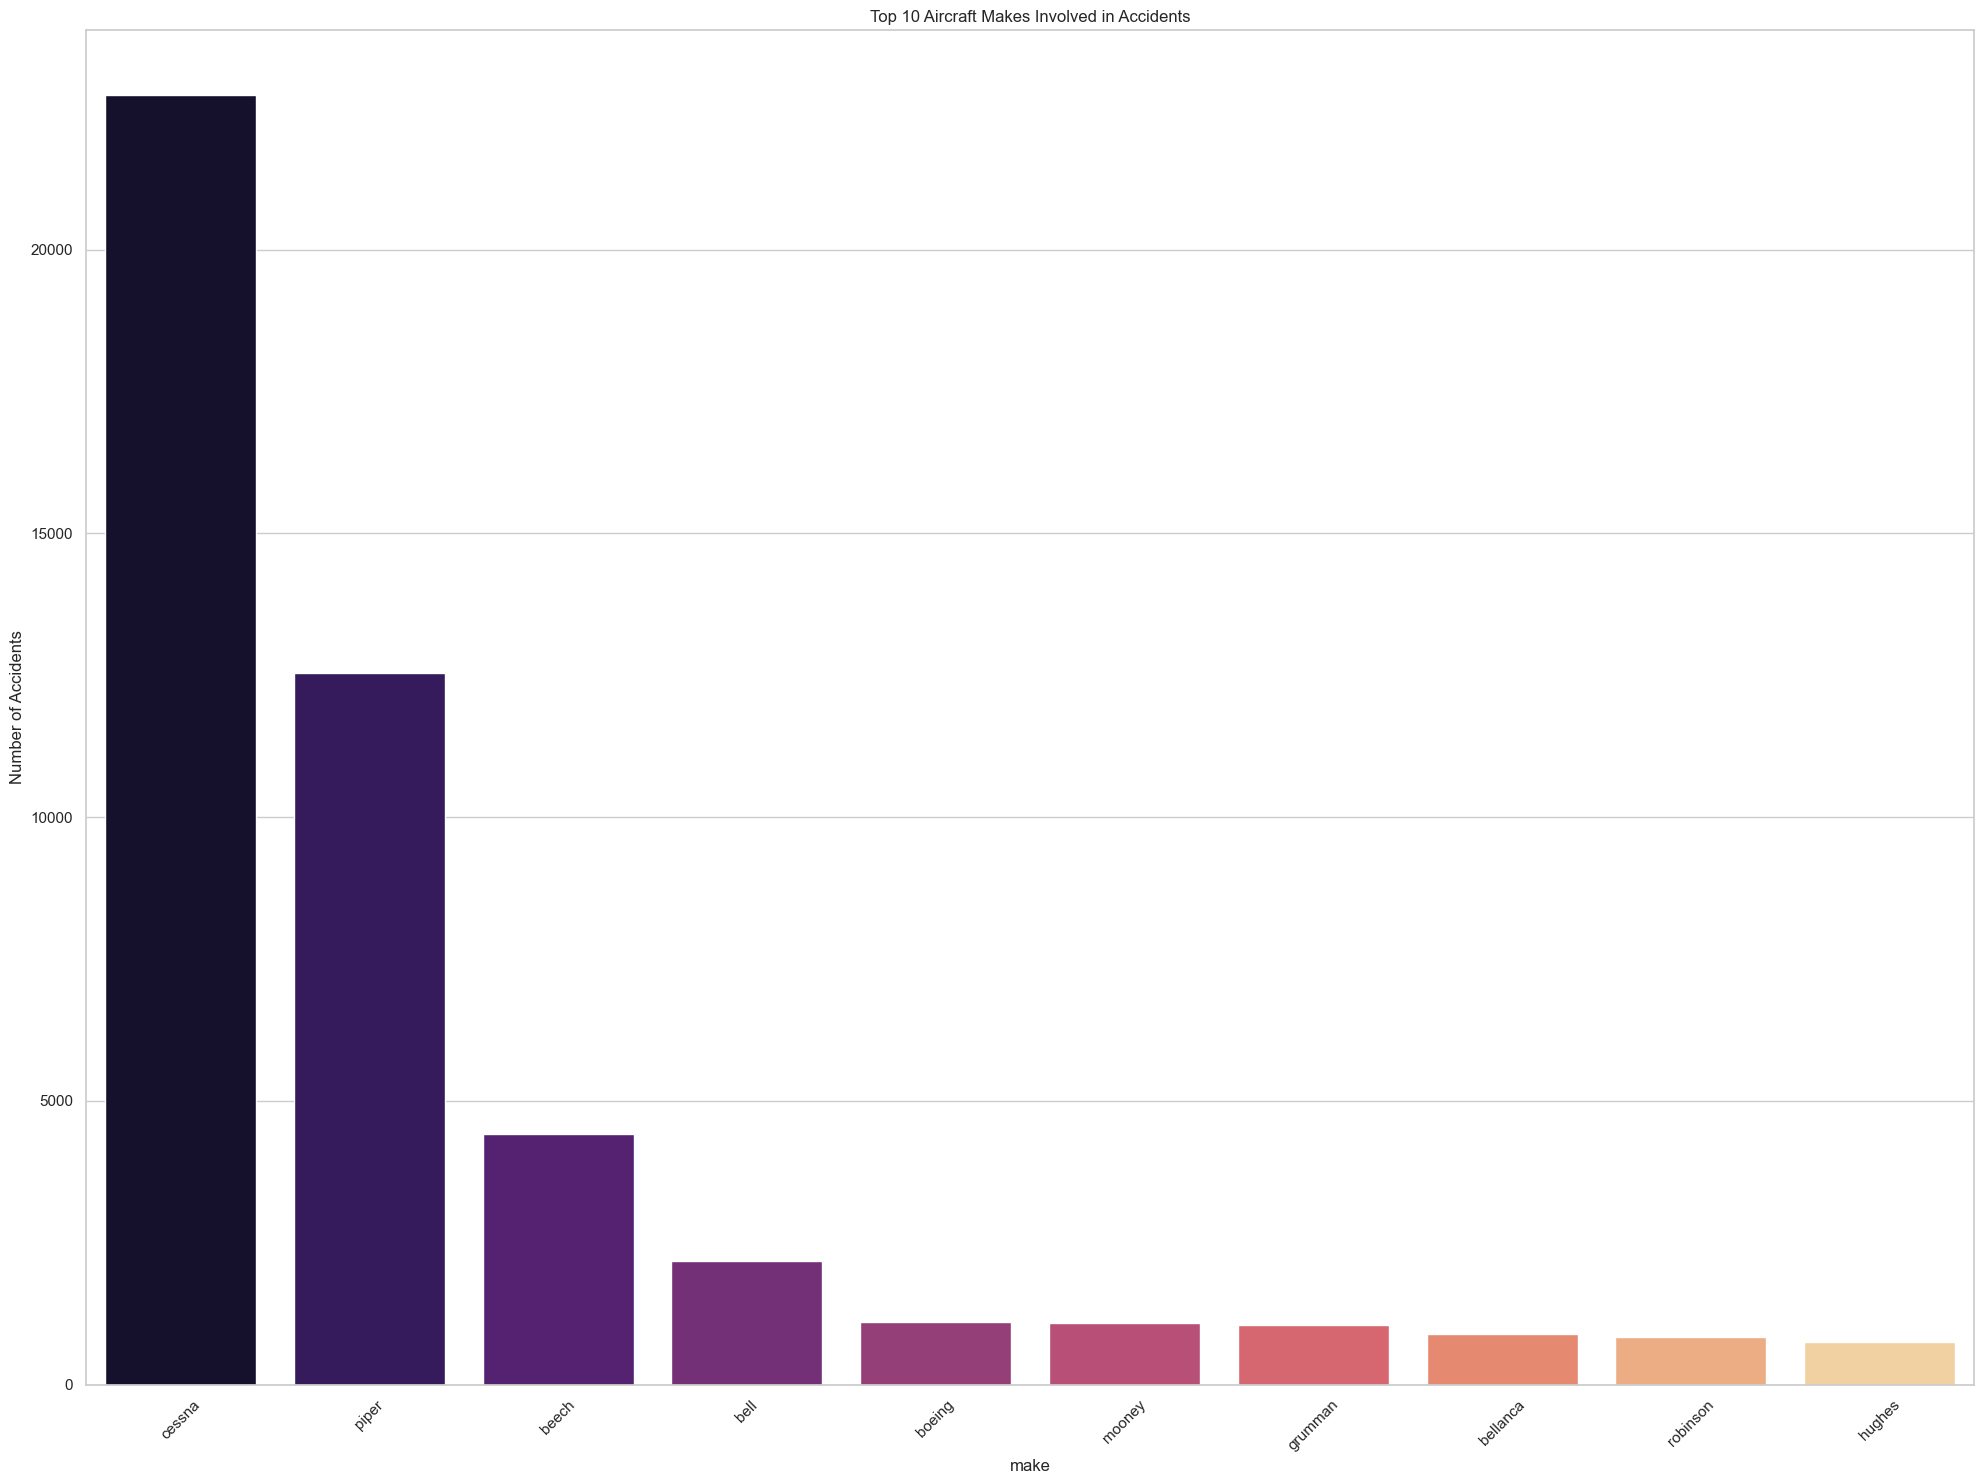

In [86]:
# The common airplanes that usually fail midair or even after landing
plt.figure(figsize=(20, 15))
top_makes = df["make"].value_counts().nlargest(10)
sns.barplot(x=top_makes.index, y=top_makes.values, palette="magma")
plt.title("Top 10 Aircraft Makes Involved in Accidents")
plt.xticks(rotation=45)
plt.ylabel("Number of Accidents")
plt.tight_layout()

plt.savefig("Top_10_involved_in_accidents.png", dpi=300, bbox_inches='tight')

plt.show()

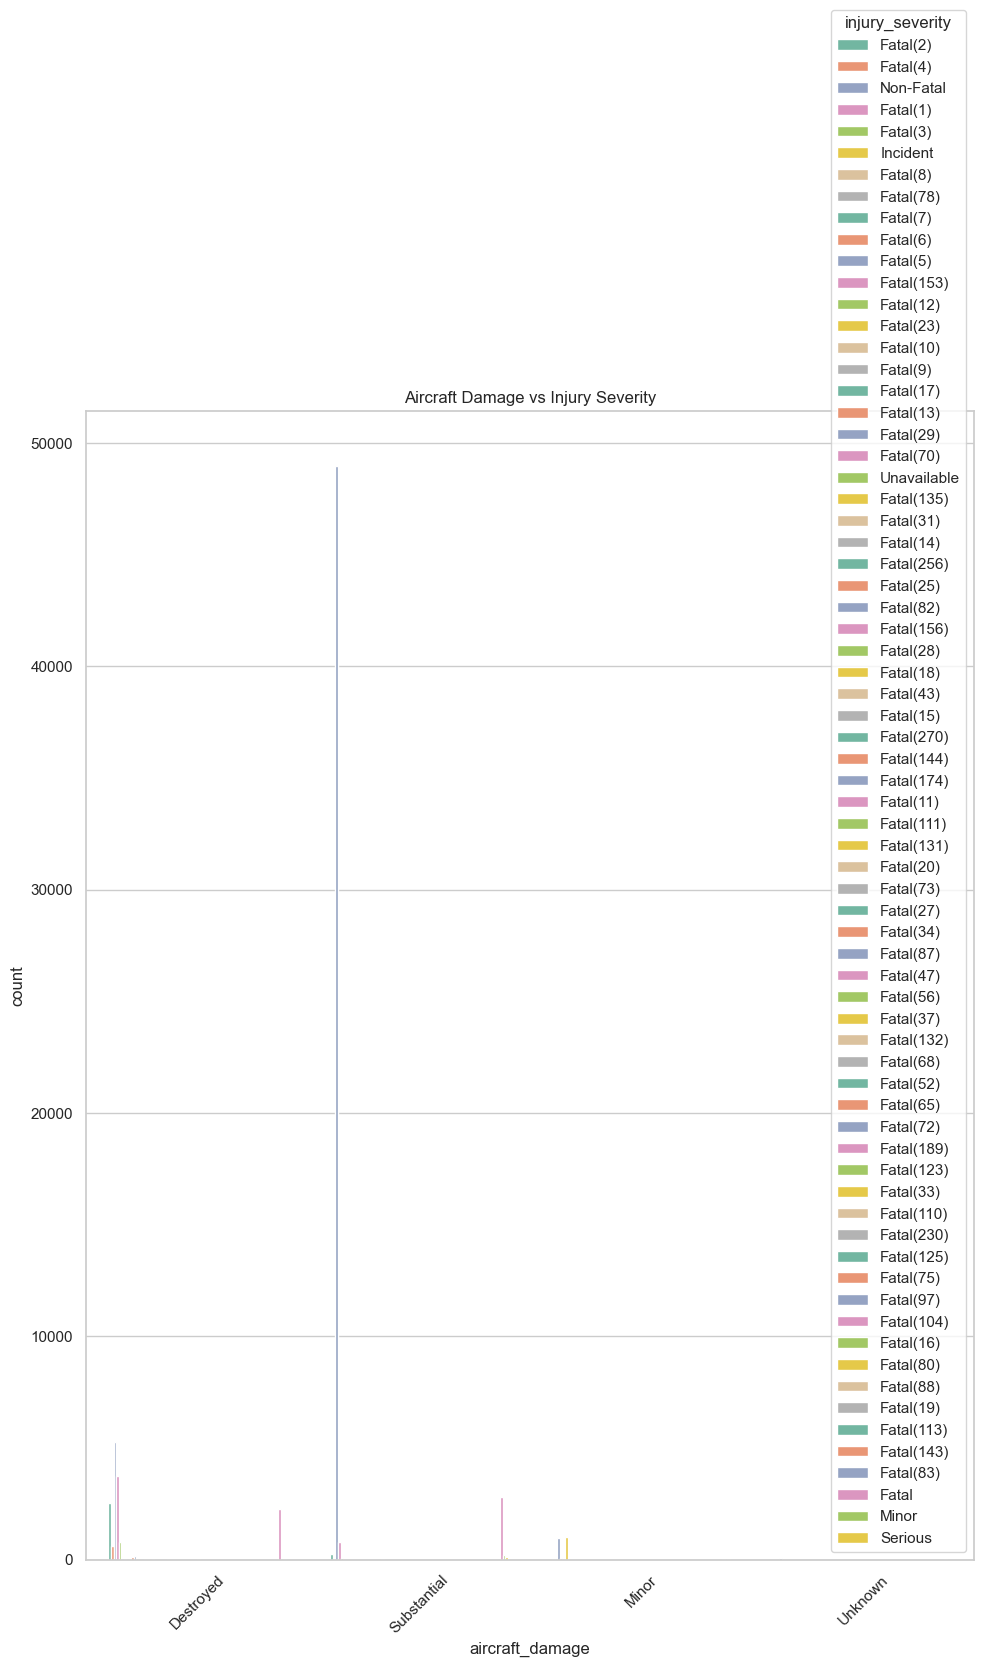

In [87]:
# Understang that some airplane accidents are much more fatal than others, it's crucial to compare which ones usually cause more severe damages
plt.figure(figsize=(10, 16))
sns.countplot(data=df, x="aircraft_damage", hue="injury_severity", palette="Set2")
plt.title("Aircraft Damage vs Injury Severity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

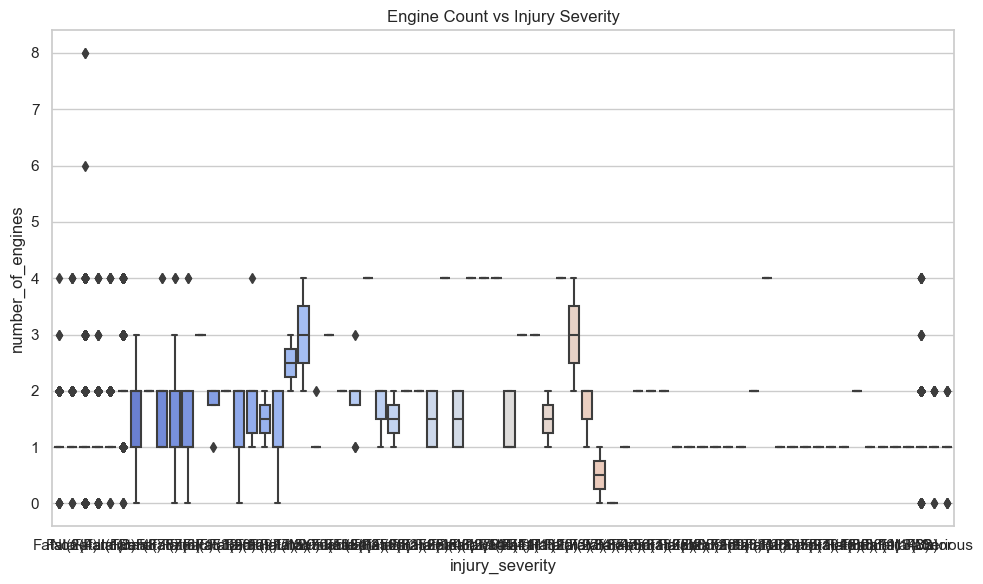

In [88]:
# The number of engines in an airplane vs injury severity on the passengers
plt.figure(figsize=(10, 6))
sns.boxplot(x="injury_severity", y="number_of_engines", data=df, palette="coolwarm")
plt.title("Engine Count vs Injury Severity")
plt.tight_layout()
plt.savefig("engine_vs_injury_severity", dpi=300, bbox_inches='tight')
plt.show()


<h1><b><span style='font-family:Georgia'>6. Assigning Risk and Safety Score </span></b></h1>

In [89]:
# With our data, we can now see which airplanes to avoid and which ones are a bit safer to fly and purchase
# So based on our injury severity data, we create a safety score based on injury severity and damage
# We assign a numeric score for safety so that we can use that later to check for safety

injury_score_map = {
    "Minor": 3,
    "Non-Fatal": 2,
    "Fatal(1)": 1,
    "Fatal(2)": 1,
    "Fatal(3)": 1,
    "Fatal(4)": 1,
    "Fatal(5)": 1,
    "Fatal(6)": 1,
    "Fatal(7)": 1,
    "Fatal(8)": 1,
    "Fatal(9)": 1,
    "Fatal(10)": 1
}
df["injury_score"] = df["injury_severity"].map(injury_score_map).fillna(0)

# Assigning score for aircraft damage
damage_score_map = {
    "Minor": 3,
    "Substantial": 2,
    "Destroyed": 1
}
df["damage_score"] = df["aircraft_damage"].map(damage_score_map).fillna(0)

# Combine scores into an overall safety score
df["safety_score"] = df["injury_score"] + df["damage_score"]

# Group by aircraft model and calculate average safety score
model_safety = df.groupby("make").agg({
    "safety_score": "mean",
    "make": "count"
}).rename(columns={"make": "incident_count"}).sort_values(by="safety_score", ascending=False)

# Filter models with at least 3 reported incidents (to remove one-time entries)
model_safety_filtered = model_safety[model_safety["incident_count"] >= 3]

# Top safest models
top_safest_models = model_safety_filtered.head(10)
print("Top 10 Safest Aircraft Models:")
print(top_safest_models)


Top 10 Safest Aircraft Models:
                            safety_score  incident_count
make                                                    
fantasy sky promotions          4.666667               3
head                            4.600000               5
head balloons inc               4.500000               4
embraer s a                     4.333333               3
gulfstream american corp.       4.333333               3
dji                             4.333333               3
waco classic aircraft corp      4.333333               3
rolladen-schneider ohg          4.333333               3
cameron balloons                4.285714               7
ultramagic                      4.285714               7


In [90]:
df

,investigation_type,event_date,country,latitude,longitude,injury_severity,aircraft_damage,aircraft_category,registration_number,make,...,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,injury_score,damage_score,safety_score
0,accident,1948-10-24,united states,missing,missing,Fatal(2),Destroyed,unknown,nc6404,stinson,...,missing,2.0,0.0,0.0,0.0,unk,cruise,1.0,1.0,2.0
1,accident,1962-07-19,united states,missing,missing,Fatal(4),Destroyed,unknown,n5069p,piper,...,missing,4.0,0.0,0.0,0.0,unk,unknown,1.0,1.0,2.0
3,accident,1977-06-19,united states,missing,missing,Fatal(2),Destroyed,unknown,n1168j,rockwell,...,missing,2.0,0.0,0.0,0.0,imc,cruise,1.0,1.0,2.0
6,accident,1981-08-01,united states,missing,missing,Fatal(4),Destroyed,unknown,n4988e,cessna,...,missing,4.0,0.0,0.0,0.0,imc,unknown,1.0,1.0,2.0
7,accident,1982-01-01,united states,missing,missing,Non-Fatal,Substantial,airplane,n2482n,cessna,...,missing,0.0,0.0,0.0,2.0,vmc,takeoff,2.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,accident,2022-12-13,united states,047257n,0109280w,Non-Fatal,Substantial,airplane,c-gzpu,piper,...,missing,0.0,0.0,0.0,1.0,unk,unknown,2.0,2.0,4.0
88873,accident,2022-12-14,united states,182724n,0066554w,Non-Fatal,Substantial,airplane,n416pc,cirrus design corp,...,sky west aviation inc trustee,0.0,0.0,0.0,1.0,vmc,unknown,2.0,2.0,4.0
88876,accident,2022-12-15,united states,373829n,0972635w,Non-Fatal,Substantial,airplane,n398kl,swearingen,...,missing,0.0,0.0,0.0,1.0,unk,unknown,2.0,2.0,4.0
88877,accident,2022-12-16,united states,282825n,0822719w,Minor,Substantial,airplane,n5405v,cessna,...,gerber richard e,0.0,1.0,0.0,0.0,vmc,unknown,3.0,2.0,5.0


# Findings

- During the first decades air transport was not a common use of transport, due to the rising growth in the aviation industry some problems started to occur.

- There was an increase in the use of air transport but we notice a trend that accidents increased due to the growth in the aviation industry as also witnessed in following years, but as time went by the number of accidents reduced.

- Most accidents involved are usually flights that are designated for personal use.

- Weather conditions did not play a big role in aircraft accidents.

- Aircrafts with one engine have a higher accident rate making aircrafts with more than one engine safer.

- Aircrafts with the engine type LR are safer.





<h1><b><span style='font-family:Georgia'>7. Recommendations</span></b></h1>

Based on safety scores and data analysis:
It is advisable to consider Robinson and Hughes aircraft models, as they have shown lower accident frequencies.

Additionally, selecting aircraft with two or more engines is recommended to enhance operational safety.


These aircraft models combine higher safety scores with established operational history, minimizing initial risks as the company ventures into aviation.


In [92]:
#Exporting the Cleaned Dataset
df.to_csv("final_aircraft_data.csv", index=False)
